In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


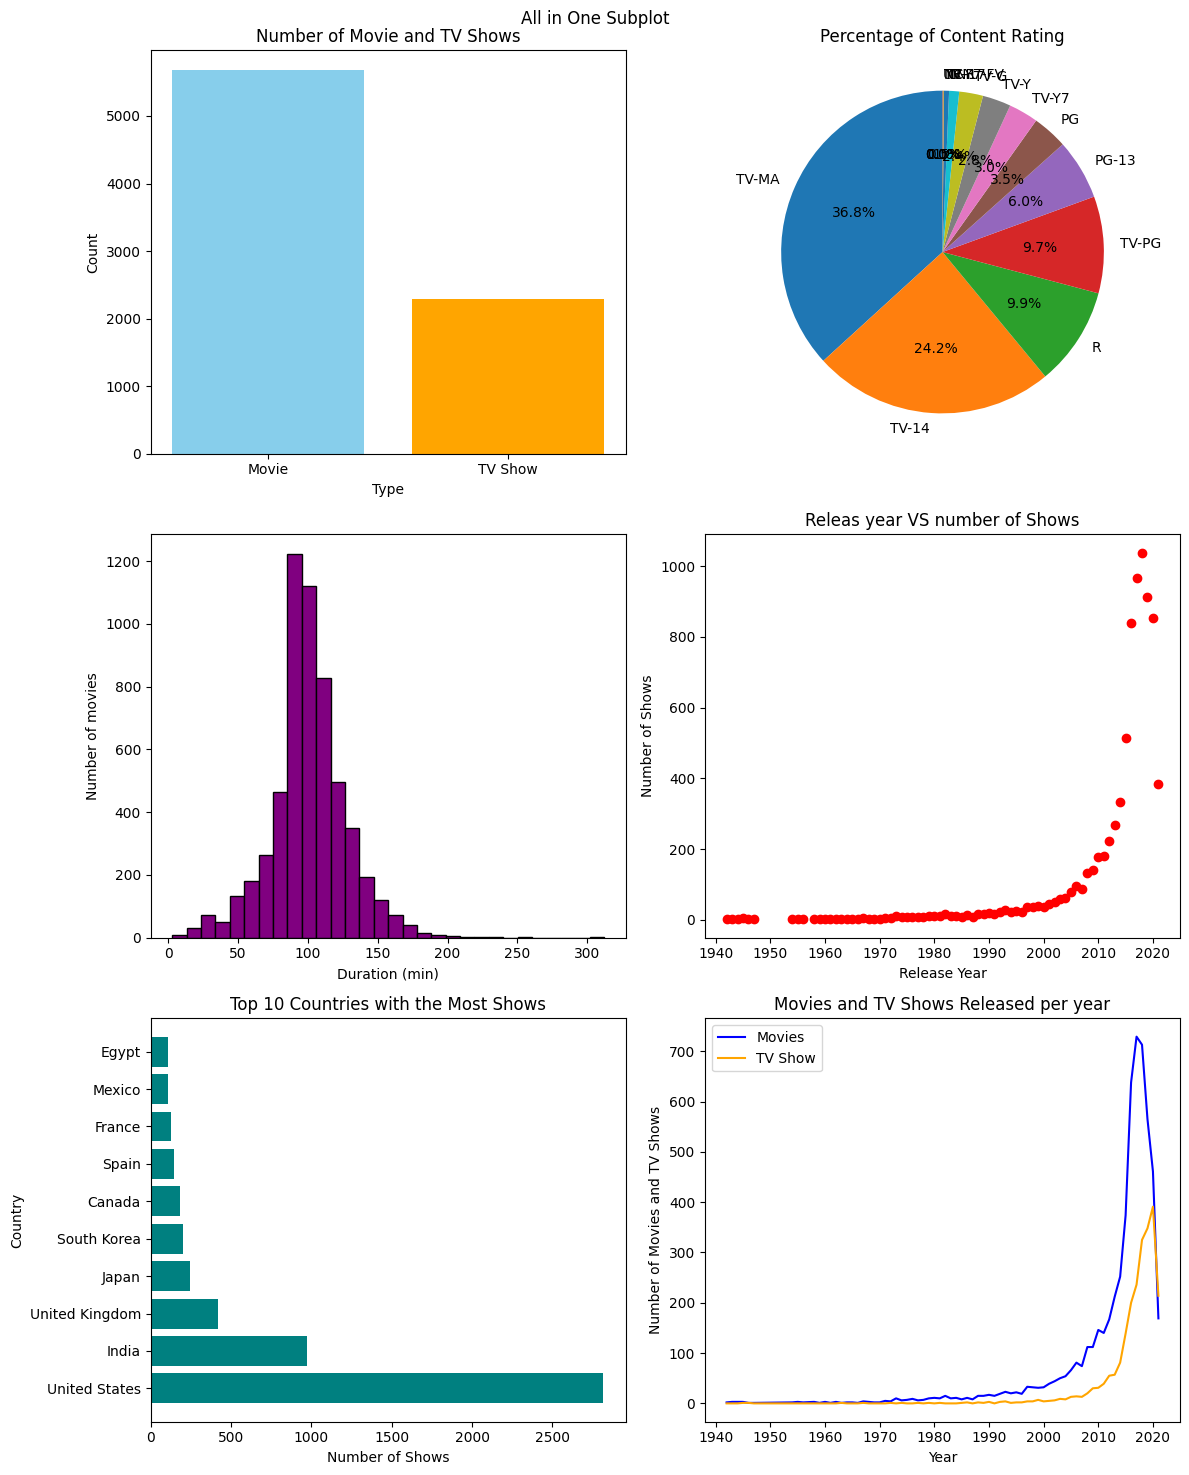

In [ ]:
# Data cleaning
df=df.dropna(subset=['type','rating','country','release_year','duration'])
type_counts=df['type'].value_counts()

# All in One Subplot
content_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
type_ratings=df['rating'].value_counts()
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration']=movie_df['duration'].str.replace(' min','').astype(int)
release_counts=df['release_year'].value_counts().sort_index()
country_counts=df['country'].value_counts().head(10)
fig,ax=plt.subplots(3,2,figsize=(12,15))

# Bar Chart
ax[0,0].bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
ax[0,0].set_title('Number of Movie and TV Shows')
ax[0,0].set_xlabel('Type')
ax[0,0].set_ylabel('Count')

# Pie Chart
ax[0,1].pie(type_ratings.values,labels=type_ratings.index,autopct='%1.1f%%',startangle=90)
ax[0,1].set_title('Percentage of Content Rating')

# Histrogram Chart
ax[1,0].hist(movie_df['duration'],bins=30,color='purple',edgecolor='black')
ax[1,0].set_xlabel('Duration (min)')
ax[1,0].set_ylabel('Number of movies')

# Scatter Chart
ax[1,1].scatter(release_counts.index,release_counts.values,color='red')
ax[1,1].set_xlabel('Release Year')
ax[1,1].set_ylabel('Number of Shows')
ax[1,1].set_title('Releas year VS number of Shows')

# Horizontal bar Chart
ax[2,0].barh(country_counts.index,country_counts.values,color='teal')
ax[2,0].set_title('Top 10 Countries with the Most Shows')
ax[2,0].set_xlabel('Number of Shows')
ax[2,0].set_ylabel('Country')

# plot Chart
ax[2,1].plot(content_year.index,content_year['Movie'],color='blue',label="Movies")
ax[2,1].plot(content_year.index,content_year['TV Show'],color='orange',label="TV Show")
ax[2,1].set_title("Movies and TV Shows Released per year")
ax[2,1].set_xlabel('Year')
ax[2,1].set_ylabel('Number of Movies and TV Shows')
ax[2,1].legend()
ax[2,1].legend()

plt.suptitle('All in One Subplot')
plt.tight_layout()
plt.savefig('all_in_one_subplot.png',dpi=300)
plt.show()